# Assignment 2: Image Enhancement
Tổng quan: Ở bài tập này, chúng ta sẽ thực hành lập trình một số hàm tăng cường chất lượng ảnh: tăng cường độ tương phản, lọc nhiễu

In [302]:
from IPython.display import Image
from matplotlib.colors import NoNorm

import matplotlib.pyplot as plt
import cv2
import numpy as np

## I. Histograms, Histogram equalization
Biểu đồ Histogram của ảnh là một dạng biểu đồ biểu diễn sự phân bố của  số lượng điểm ảnh tương ứng với mức độ sáng tối của bức ảnh.
- Trong đó, trục dọc biểu diễn số lượng điểm ảnh, các đỉnh càng cao thì càng có nhiều điểm ảnh ở khu vực đó và độ chi tiết càng nhiều. 
- Trục ngang tính từ trái qua phải với mốc giá trị từ 0 đến 255 biểu diễn độ sáng của mỗi khu vực ảnh. Gốc giá trị 0 được coi là tối nhất tựa như màu đen tuyền trong khi càng dịch sang phải giá trị này càng tăng, ngọn sáng nhất của ánh sáng ở giá trị 255.

Để tính được Histogram của một ảnh, ta có thể dùng một trong các hàm sau:
- cv2.calcHist() - https://docs.opencv.org/4.5.2/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d
- plt.hist() - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html


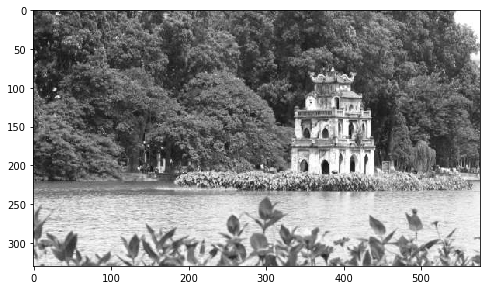

In [303]:
img = cv2.imread('images/HoGuom.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.show()

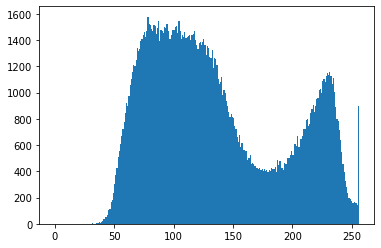

In [235]:
plt.hist(img.ravel(),256,[0,256]);
plt.show()

Dựa vào Histogram có thể  biết được bức ảnh là tối (dark) hay sáng (bright).

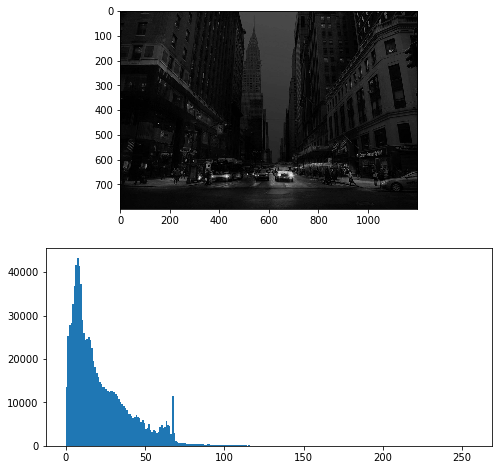

In [236]:
img = cv2.imread('images/dark.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

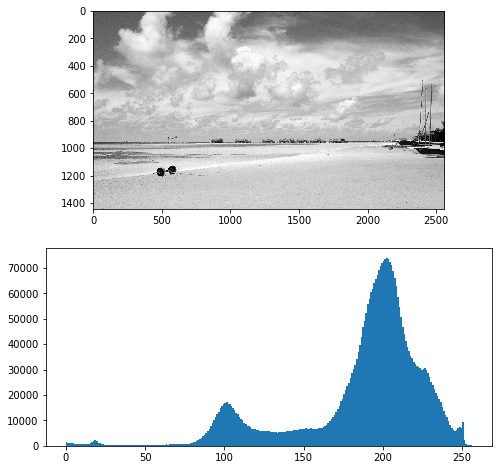

In [237]:
img = cv2.imread('images/bright.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

Đối với ảnh màu, ta có thể xem Histogram của từng kênh màu

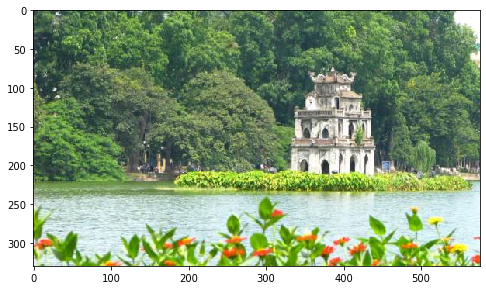

In [238]:
img = cv2.imread('images/HoGuom.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

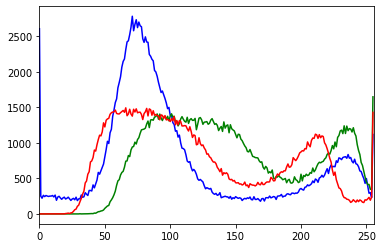

In [239]:
img = cv2.imread('images/HoGuom.jpg', cv2.IMREAD_COLOR)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Histogram Equalization

Thư viện OpenCV cung cấp hàm để Equalize Histogram:
- cv2.equalizeHist() - https://docs.opencv.org/4.5.2/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e

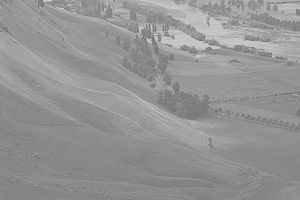

In [240]:
Image('images/unequalized.jpg')

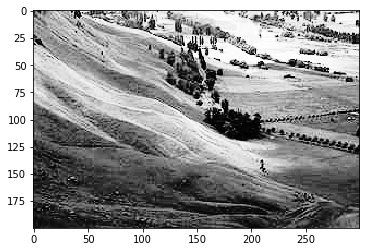

In [241]:
img = cv2.imread('images/unequalized.jpg', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
plt.imshow(equ, cmap='gray')
plt.show()

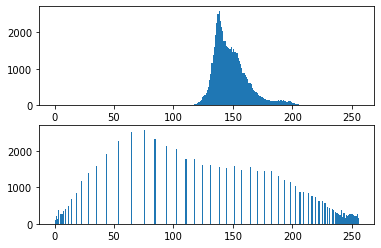

In [242]:
plt.subplot(211)
plt.hist(img.ravel(),256,[0,256])

plt.subplot(212)
plt.hist(equ.ravel(),256,[0,256])
plt.show()

Tuy nhiên không phải lúc nào Equalize Histogram toàn bộ ảnh cũng giúp đạt kết quả mong muốn

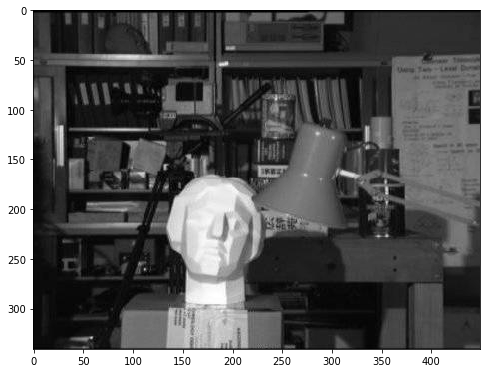

In [243]:
img = cv2.imread('images/statue_bright.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.show()

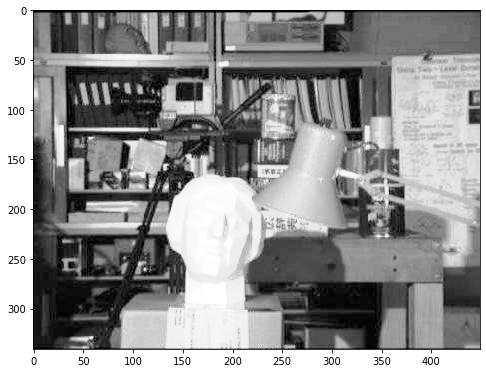

In [244]:
img = cv2.imread('images/statue_bright.jpg', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
plt.figure(figsize=(8,8))
plt.imshow(equ, cmap='gray')
plt.show()

### CLAHE (Contrast Limited Adaptive Histogram Equalization)

Để giải quyết trường hợp này, ta cần dùng một phương pháp Histogram Equalization đặc biệt. Ảnh sẽ được chia thành các khối viên gạch "tiles" nhỏ (tileSize default của OpenCV là 8x8). Sau đó mỗi khối này được Equalize Histogram riêng. Nhờ đó histogram sẽ chỉ giới hạn trong một vùng nhỏ. 

Thư viện OpenCV cung cấp hàm:
- cv2.createCLAHE() - https://docs.opencv.org/4.5.2/d6/dc7/group__imgproc__hist.html#gad689d2607b7b3889453804f414ab1018
- CLAHE clipLimit: https://stackoverflow.com/questions/64576472/what-does-clip-limit-mean-exactly-in-opencv-clahe

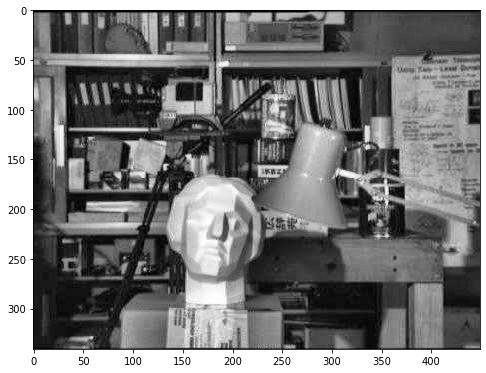

In [245]:
img = cv2.imread('images/statue_bright.jpg', cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img = clahe.apply(img)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.show()

# II. Cài đặt một số kỹ thuật tăng cường độ tương phản

### Square transform (hiệu ứng tương ứng giống gama correction với gama >1)


Giá trị mới của điểm ảnh = square(giá trị cũ)


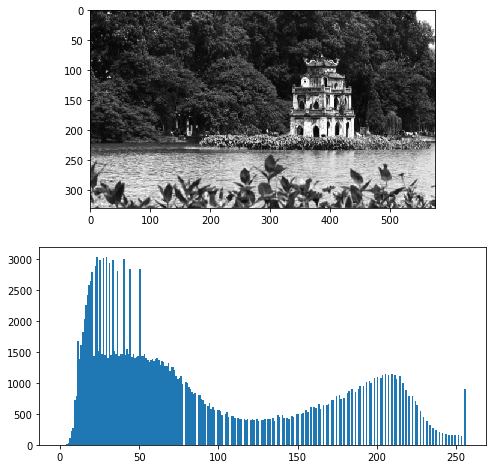

In [246]:
img = cv2.imread('images/HoGuom.jpg', cv2.IMREAD_GRAYSCALE)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j] = int(np.square(int(img[i][j]))/255)
        
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

### Square root transform: hiệu ứng tương ứng giống gama correction với gama <1

Giá trị mới của điểm ảnh = sqrt(giá trị cũ)

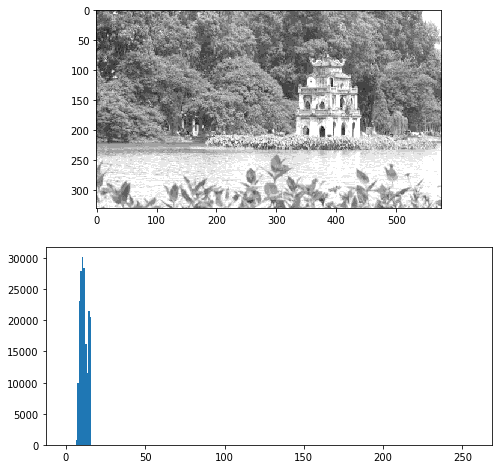

In [247]:
img = cv2.imread('images/HoGuom.jpg', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j] = int(np.sqrt(int(img[i][j])))
### YOUR CODE HERE ###
        
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

### Image Addition: Cộng ảnh với chính nó cho phép tăng cường độ tương phản

Hãy hoàn thiện đoạn code sau để cộng ảnh với chính nó. 

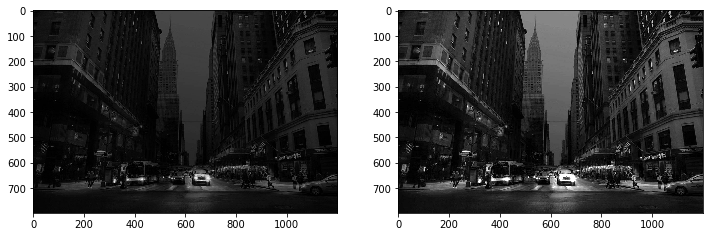

In [248]:
img = cv2.imread('images/dark.jpg', 0)

### YOUR CODE HERE ###
# Chuyển sang float để tránh tràn số
img_float = np.array(img, np.float16)
img_add = img + img_float

# Chuyển về uint8 để hiển thị
img_add = np.clip(img_add, 0, 255)
img_add = np.array(img_add, np.uint8)
### YOUR CODE HERE ###

# Show the image
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.imshow(img_add, cmap='gray')
plt.show()

### Log Transformation

Hãy sử dụng phép biến đổi log (đã được trình bày trong bài giảng) để thay đổi giá trị của điểm ảnh

$$s = c*log(1+r)$$
$$c = \frac{255}{log(1 + MaxInputPixelValue)}$$

Tài liệu tham khảo thêm: https://theailearner.com/2019/01/01/log-transformation/

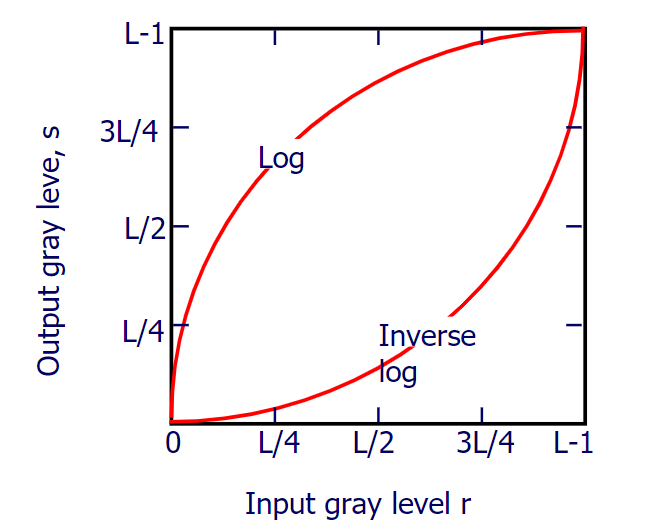

In [249]:
Image('images/log.png')

In [250]:
# Hoàn thiện hàm biến đổi log trên ảnh

In [251]:
def log_transformation(img):
    ### YOUR CODE HERE ###
    # Apply log transformation method
    log_image = img.copy()
    log_image = np.array(log_image, dtype = np.float64)
    c = 255 / np.log(1 + np.max(log_image))
    log_image = c * (np.log(log_image + 1))
   
    # Specify the data type so that float value will be converted to int
    log_image = np.array(log_image, dtype = np.uint8)
    ### YOUR CODE HERE ###
    return log_image

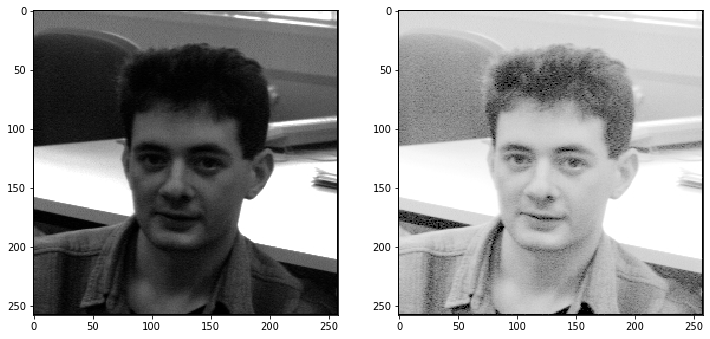

In [252]:
# Read an image
image = cv2.imread('images/log_img.jpg', 0)
   
# log transformation
log_image = log_transformation(image)
   
# Show the images
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image, cmap='gray')

plt.subplot(122)
plt.imshow(log_image, cmap='gray')
plt.show()

## II. Lọc ảnh

cv2.filter2D - https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04

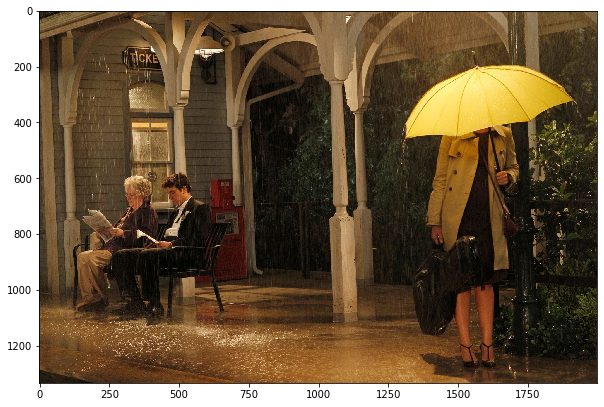

In [258]:
img = cv2.imread('images/himym.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

### Averaging kernel - Kernel lấy trung bình các điểm ảnh xung quanh

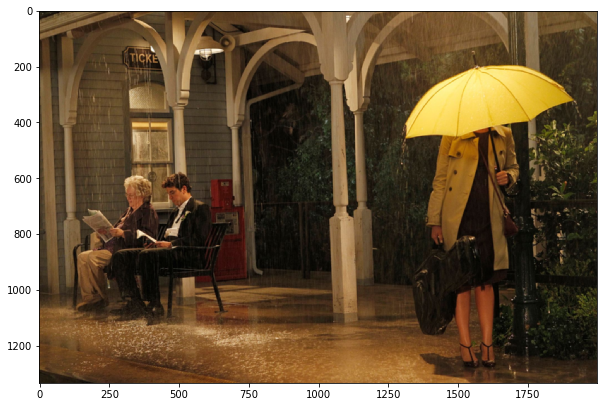

In [259]:
img = cv2.imread('images/himym.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5),np.float32)/25 # tạo bộ lọc
img = cv2.filter2D(img, -1, kernel)   # nhân chập ảnh với mặt nạ
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

### Sharpening kernel - Kernel tăng độ nét của ảnh

Hoàn thiện đoạn code dưới đây để tăng cường độ sắc nét của ảnh

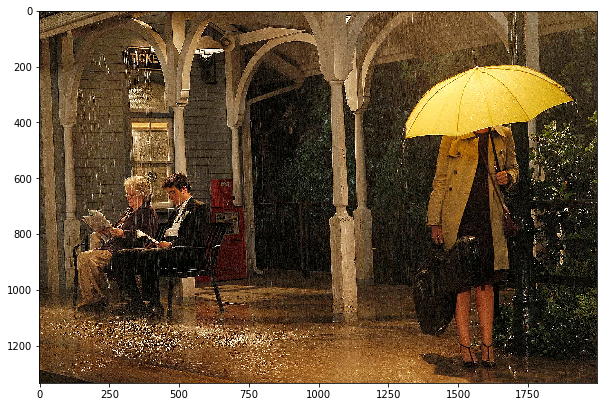

In [260]:
img = cv2.imread('images/himym.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
### YOUR CODE HERE ###
kernel_sharpening = np.array([[0,-1,0], 
                              [-1, 5,-1],
                              [0,-1, 0]])
img = cv2.filter2D(img, -1, kernel_sharpening)
### YOUR CODE HERE ###
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

### Blur, GaussiannBlur, medianBlur,...

Một số kernel đặc biệt dùng để làm mịn ảnh.

- cv2.blur: https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37
- cv2.GaussianBlur: https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1
- cv2.medianBlur: https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9

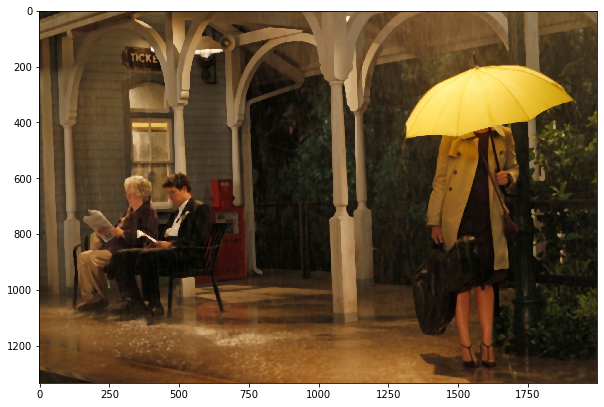

In [261]:
img = cv2.imread('images/himym.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = cv2.blur(img, (7, 7), 0)
# img = cv2.GaussianBlur(img, (9, 9), 0)
img = cv2.medianBlur(img, 9)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

# III. Khử nhiễu và tăng chất lượng ảnh ở các bài tập sau


## Bài tập 1: Noise Reduction

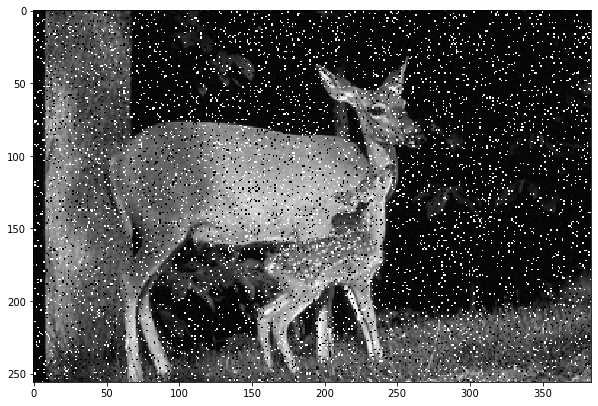

In [262]:
img = cv2.imread('images/deer_salt.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

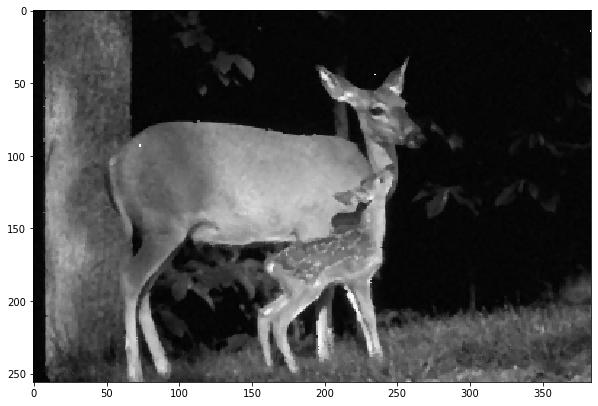

In [263]:
img = cv2.imread('images/deer_salt.jpg', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###

# img = cv2.blur(img, (5,5), 0)
# img = cv2.GaussianBlur(img, (5,5), 0)
img = cv2.medianBlur(img, 3)

# kernel_sharpening = np.array([[-1,-1,-1], 
#                               [-1, 9,-1],
#                               [-1,-1,-1]])
# img = cv2.filter2D(img, -1, kernel_sharpening)

### YOUR CODE HERE ###

plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

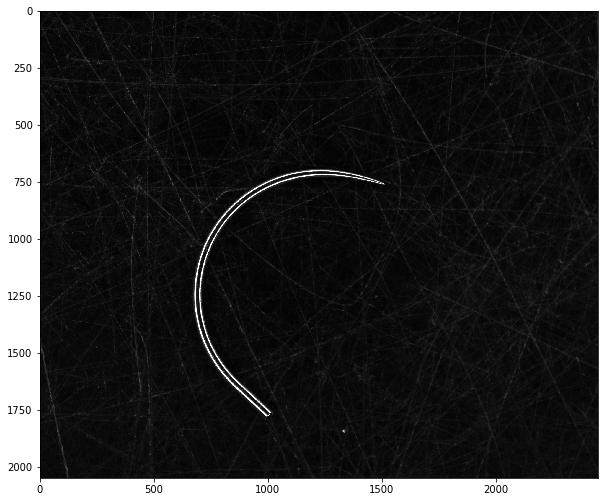

In [264]:
img = cv2.imread('images/needle1.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

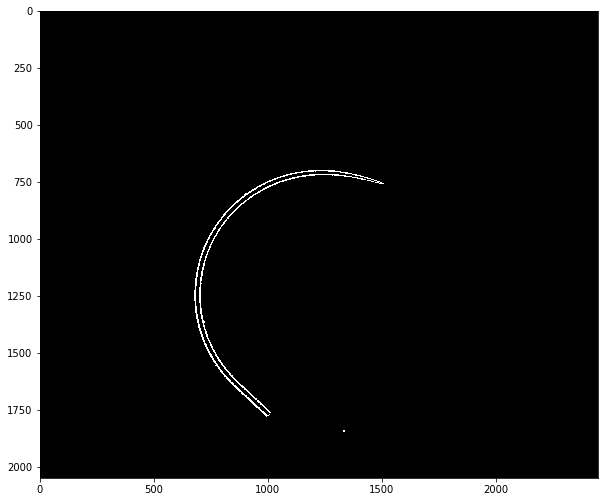

In [265]:
img = cv2.imread('images/needle1.png', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###
img = cv2.medianBlur(img, 3)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] < 100:
            img[i][j] = 0
        else:
            img[i][j] = 255
### YOUR CODE HERE ###
            
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

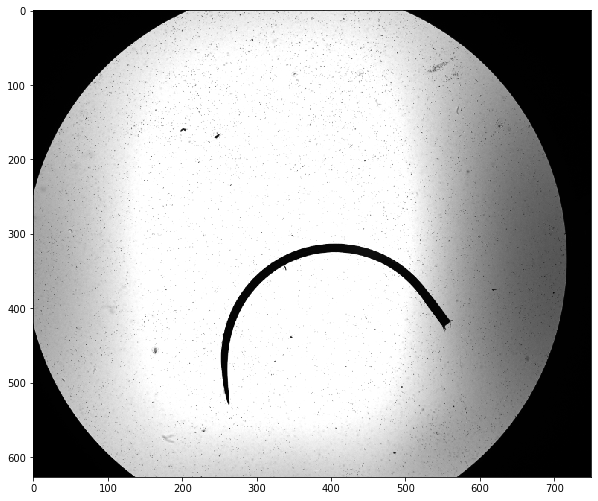

In [266]:
img = cv2.imread('images/needle2.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

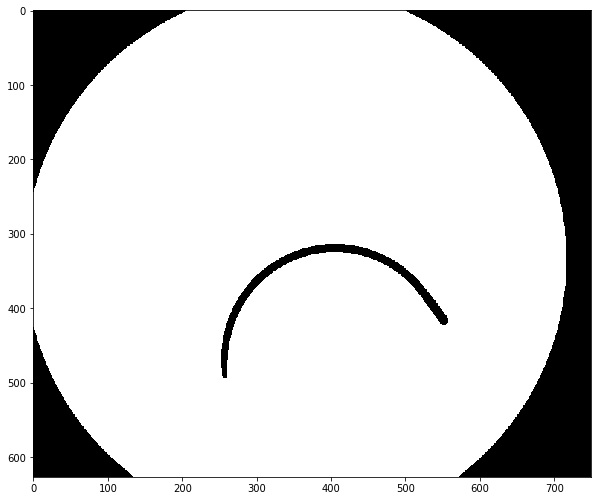

In [267]:
img = cv2.imread('images/needle2.png', 0)

### YOUR CODE HERE ###
img = cv2.medianBlur(img, 13)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] > 60:
            img[i][j] = 255
        else:
            img[i][j] = 0

### YOUR CODE HERE ###

plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

## Bài tập 2: Image Enhancement
### 1. Moon

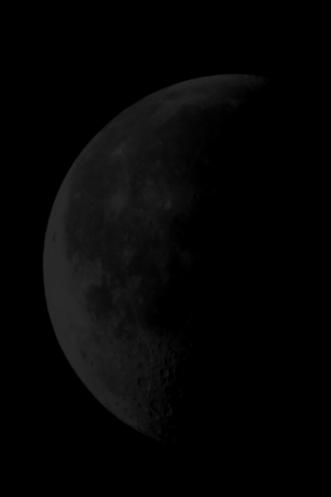

In [268]:
Image('images/moon_dark.jpg')

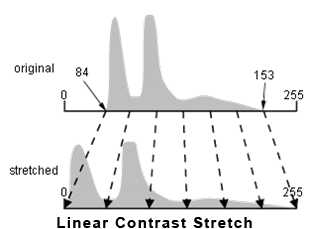

In [269]:
Image('images/linear-stretch.png')

Yêu cầu: Xây dựng hàm linear_stretch
- Xác định giá trị điểm ảnh lớn nhất (d), nhỏ nhất (c) của ảnh đầu vào
- Xác định giá trị lớn nhất (b), nhỏ nhất (a) của ảnh đầu ra (với ảnh 8 bit thì a=0 và b=255)
- Giá trị điểm ảnh mới được tính theo công thức:
$$image[i, j] = \frac{b-a}{d-c} * (image[i, j] - c) + a$$

In [270]:
def linear_stretch(image):
    """ Thực hiện phép biến đổi tuyến tính để tăng cường độ tương phản ảnh đầu vào (ảnh đa mức xám)
    bằng phương pháp kéo giãn histogram theo công thức trên
    -----------------------------------------------------
     """
    ### YOUR CODE HERE
    a = 0
    b = 255
    c = np.min(image)
    d = np.max(image)
    rows, columns = np.shape(image)
    image1 = np.zeros((rows, columns), dtype=int)
    for i in range(rows):
        for j in range(columns):
            if (d-c) == 0:
                image1[i, j] = ((b - a) / 0.000001) * (image[i, j] - c) + a
            else:
                image1[i, j] = ((b - a) / (d - c)) * (image[i, j] - c) + a

    return np.uint8(image1)
    ### YOUR CODE HERE

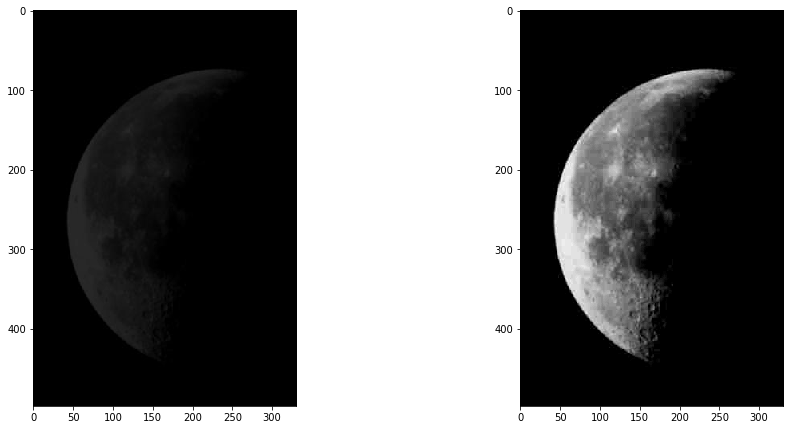

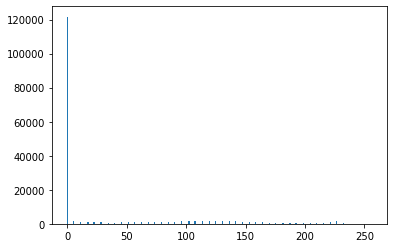

In [301]:
img = cv2.imread('images/moon_dark.jpg', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###
#img_modif = log_transformation(img)
#img_modif = gamma_correction(img, 1.2)
# img = cv2.convertScaleAbs(img, 1.1, 5)
img_modif = linear_stretch(img)

### YOUR CODE HERE ###

# Show the images

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(img, cmap='gray', norm=NoNorm()) #plt.imshow(img,cmap='gray') ==> img displayed as linear_stretch(img)

plt.subplot(222)
plt.imshow(img_modif, cmap='gray', norm=NoNorm())
plt.show()

plt.hist(img_modif.ravel(),256,[0,256])
plt.show()

### 2. Balloon

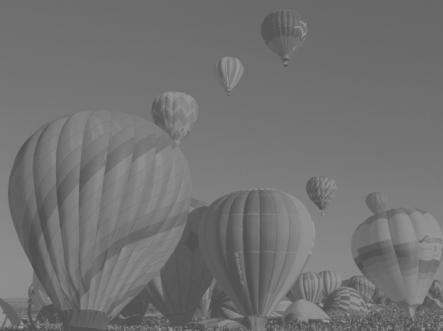

In [174]:
Image('images/balloon.jpg')

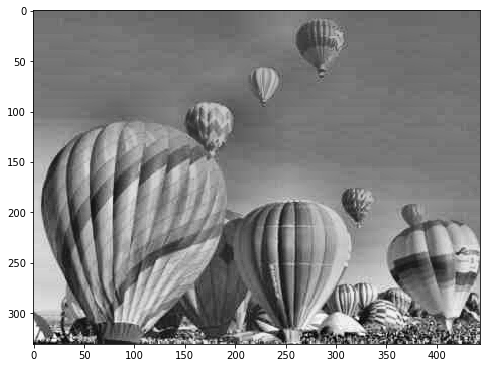

In [279]:
img = cv2.imread('images/balloon.jpg', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###
#img = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
img = clahe.apply(img)
### YOUR CODE HERE ###

plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')
plt.show()

### 3. Girl

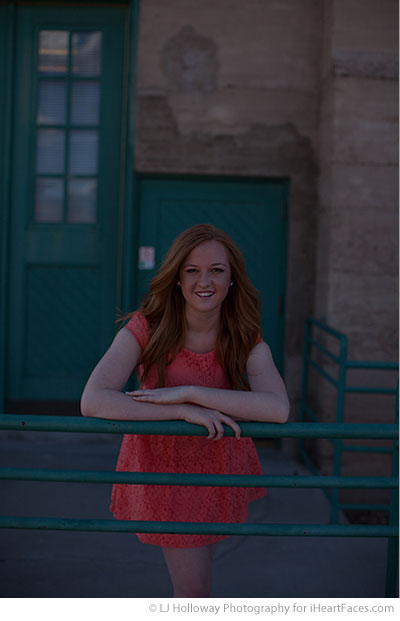

In [280]:
Image('images/girl1_dark.jpg')

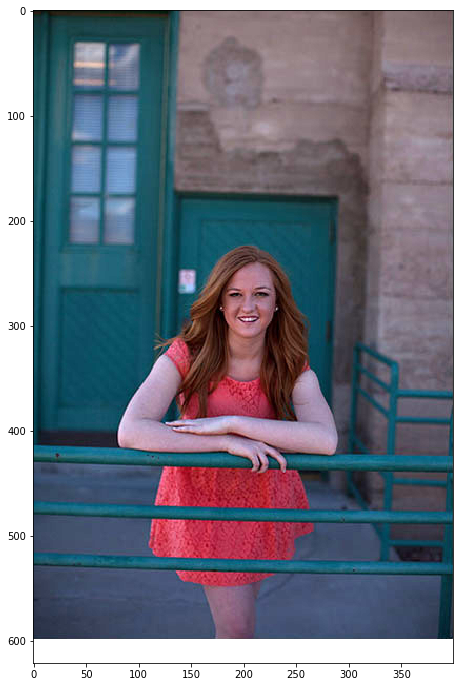

In [282]:
img = cv2.imread('images/girl1_dark.jpg')

### YOUR CODE HERE ###

img = cv2.convertScaleAbs(img, 1.3, 2)

### YOUR CODE HERE ###

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(img,cmap='gray')
plt.show()